# Topic Modeling on the Newsgroup dataset

This notebook loads the Newsgroups dataset, performs preprocessing, applies LDA and NMF to extract 10 topics, and then plots the results.

In [1]:
import pickle
with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

# Extraire les documents
if isinstance(newsgroup_data, list):
    docs = newsgroup_data
elif hasattr(newsgroup_data, 'data'):
    docs = newsgroup_data.data
else:
    docs = newsgroup_data['data']

print(f"{len(docs)} documents loaded.")

2000 documents loaded.


## 1. LDA Modelisation 
Preprocessing and extraction of the 10 topics using Latent Dirichlet Allocation.

LDA Topics:
Topic 0: 25, 10, 12, 11, period, 35, 37, 34, data, new
Topic 1: time, space, edu, ground, does, don, new, use, faq, mail
Topic 2: just, don, like, car, good, think, know, way, use, time
Topic 3: drive, scsi, know, like, does, use, just, thanks, problem, card
Topic 4: year, don, right, kings, puck, did, good, think, game, got
Topic 5: game, team, games, win, players, play, season, year, hockey, like
Topic 6: 55, disk, drives, rom, drive, hard, bios, 10, controller, 16
Topic 7: edu, space, com, nasa, center, cancer, research, data, information, available
Topic 8: people, god, don, think, just, time, know, say, does, believe
Topic 9: monitor, does, like, know, edu, used, gordon, soon, banks, pitt


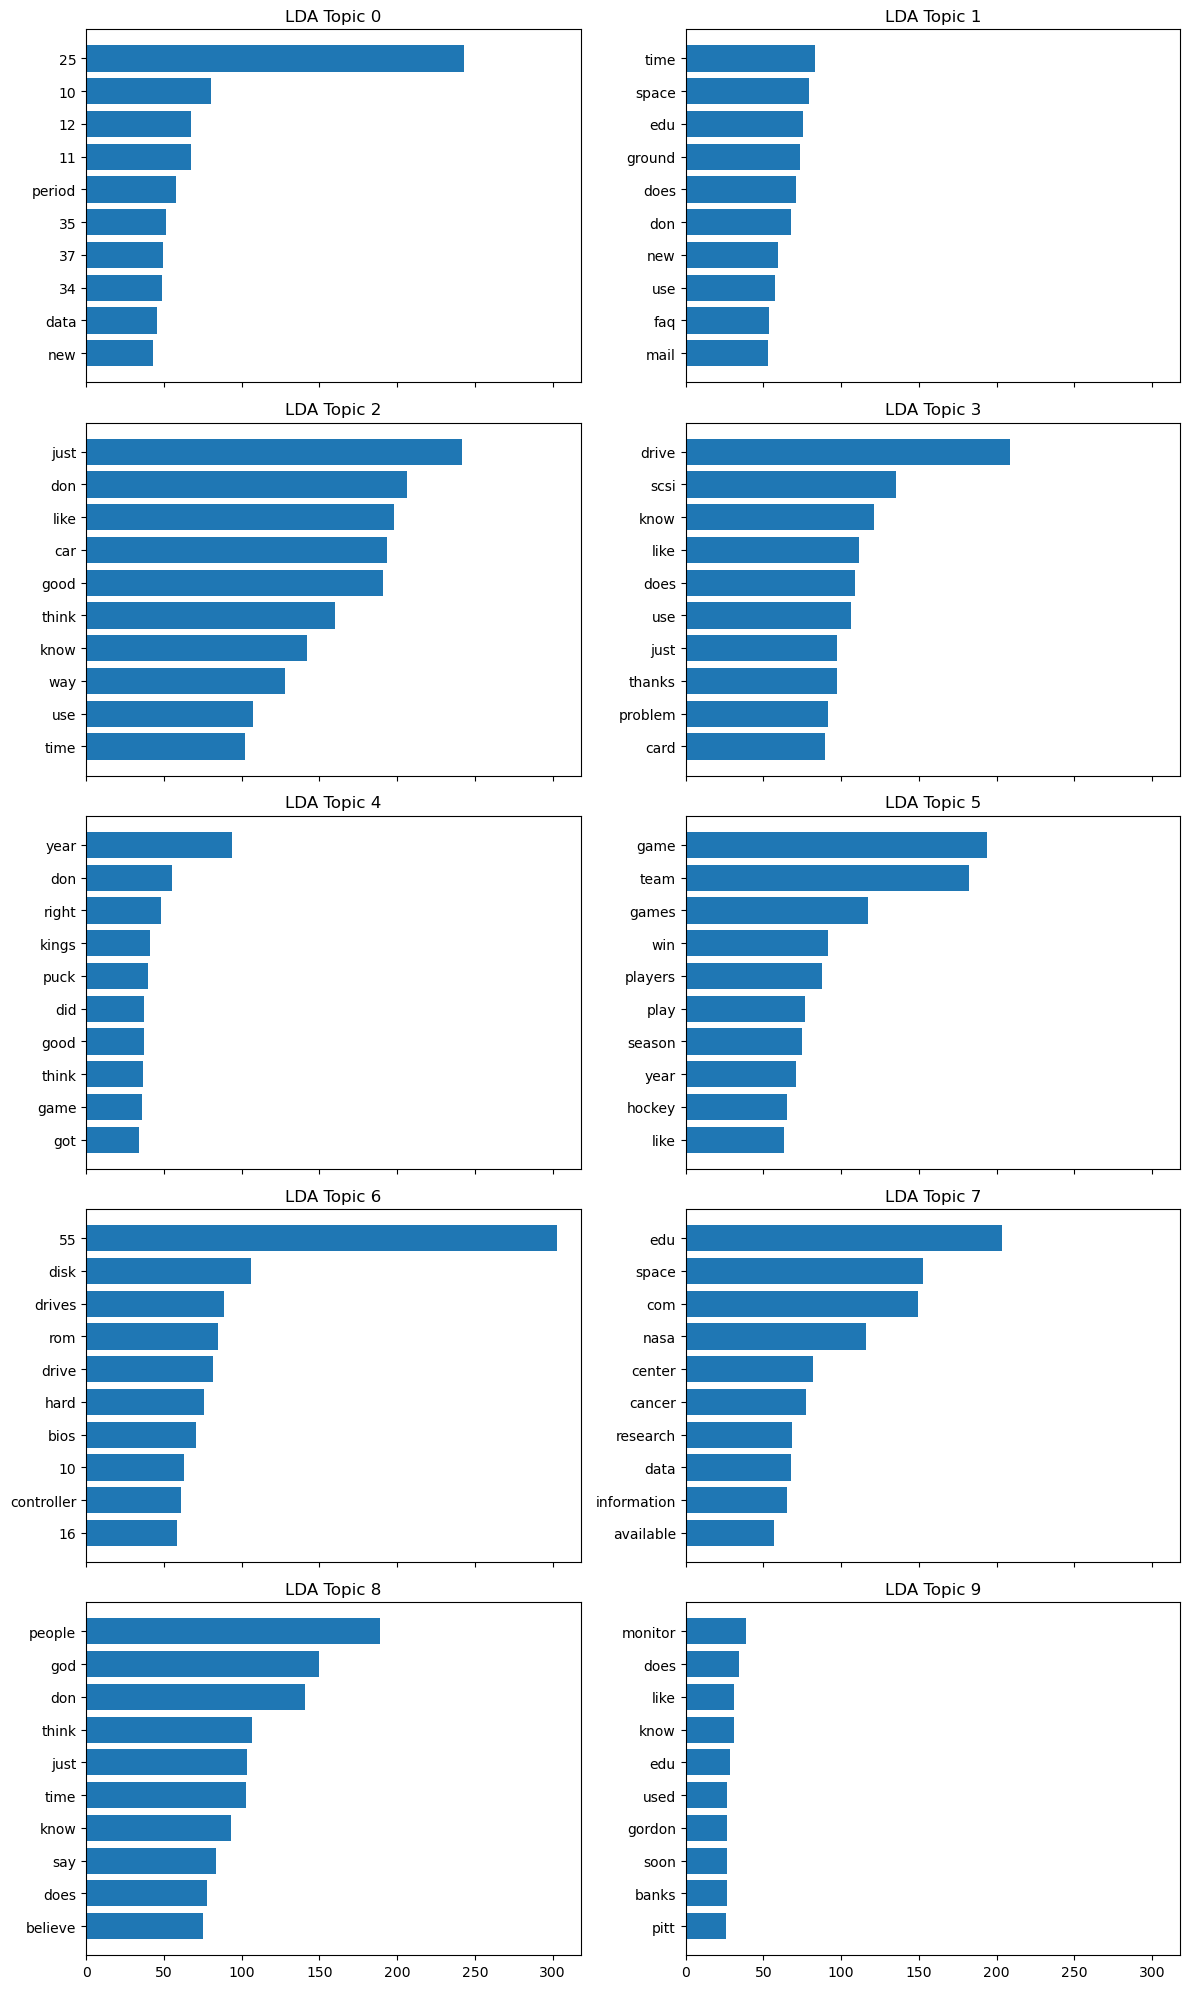

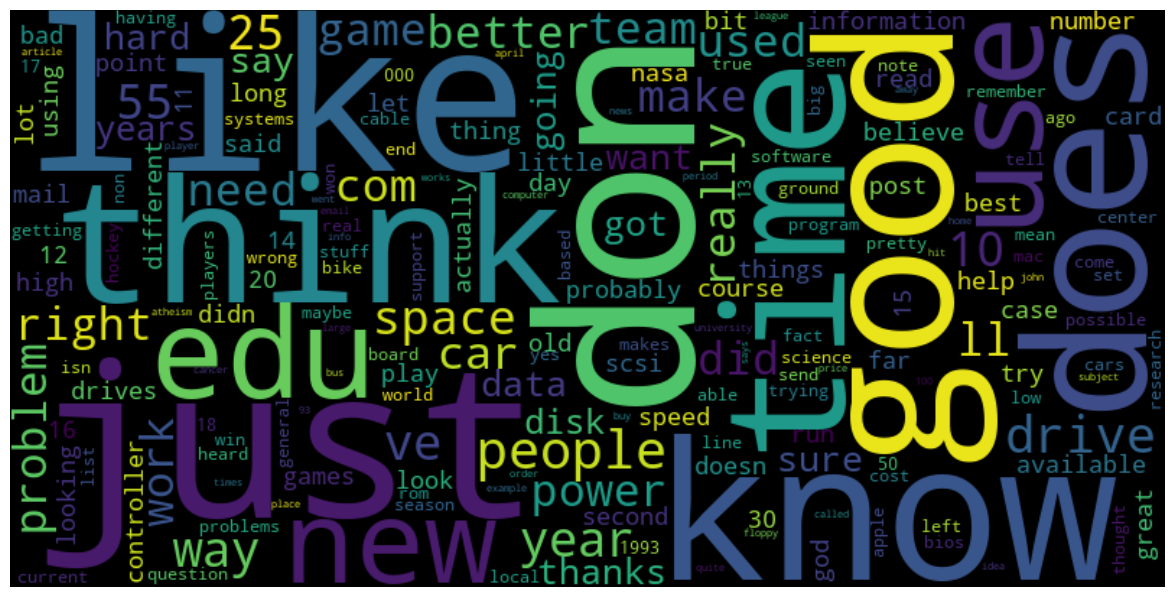

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Vectorisation
vectorizer_lda = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer_lda.fit_transform(docs)

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

# Fonctions utilitaires
def get_top_words(model, feature_names, n_top):
    topics = []
    for comp in model.components_:
        idx = comp.argsort()[::-1][:n_top]
        topics.append([feature_names[i] for i in idx])
    return topics

feat_lda = vectorizer_lda.get_feature_names_out()
lda_topics = get_top_words(lda, feat_lda, 10)

# Affichage
print("LDA Topics:")
for i, topic in enumerate(lda_topics):
    print(f"Topic {i}: {', '.join(topic)}")

# Bar charts
fig, axes = plt.subplots(5, 2, figsize=(12, 20), sharex=True)
axes = axes.flatten()
for i, ax in enumerate(axes):
    comp = lda.components_[i]
    idx = comp.argsort()[::-1][:10]
    words = feat_lda[idx]
    weights = comp[idx]
    ax.barh(range(10), weights[::-1])
    ax.set_yticks(range(10))
    ax.set_yticklabels(words[::-1])
    ax.set_title(f"LDA Topic {i}")
fig.tight_layout()
plt.show()

# Word cloud global
avg_weights = lda.components_.mean(axis=0)
freqs = {feat_lda[i]: avg_weights[i] for i in range(len(feat_lda))}
wc = WordCloud(width=800, height=400).generate_from_frequencies(freqs)
plt.figure(figsize=(15, 7.5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. NMF Modelisation 
Preprocessing and extraction of the 10 topics using Non-negative Matrix Factorization.

NMF Topics:
Topic 0: don, just, think, people, time, ve, like, good, way, bike
Topic 1: year, 10, good, games, 12, 11, 20, league, years, 17
Topic 2: geb, pitt, n3jxp, cadre, dsl, intellect, chastity, skepticism, shameful, surrender
Topic 3: game, team, hockey, players, games, play, season, leafs, toronto, teams
Topic 4: drive, disk, scsi, drives, hard, cable, floppy, problem, power, mac
Topic 5: car, cars, driving, dealer, miles, auto, like, engine, volvo, speed
Topic 6: space, nasa, data, launch, shuttle, program, sci, information, lunar, edu
Topic 7: thanks, does, know, monitor, mail, advance, simms, info, apple, use
Topic 8: card, bus, controller, scsi, dma, ide, isa, motherboard, pc, bit
Topic 9: god, say, atheism, freewill, satan, does, tells, belief, angels, believe


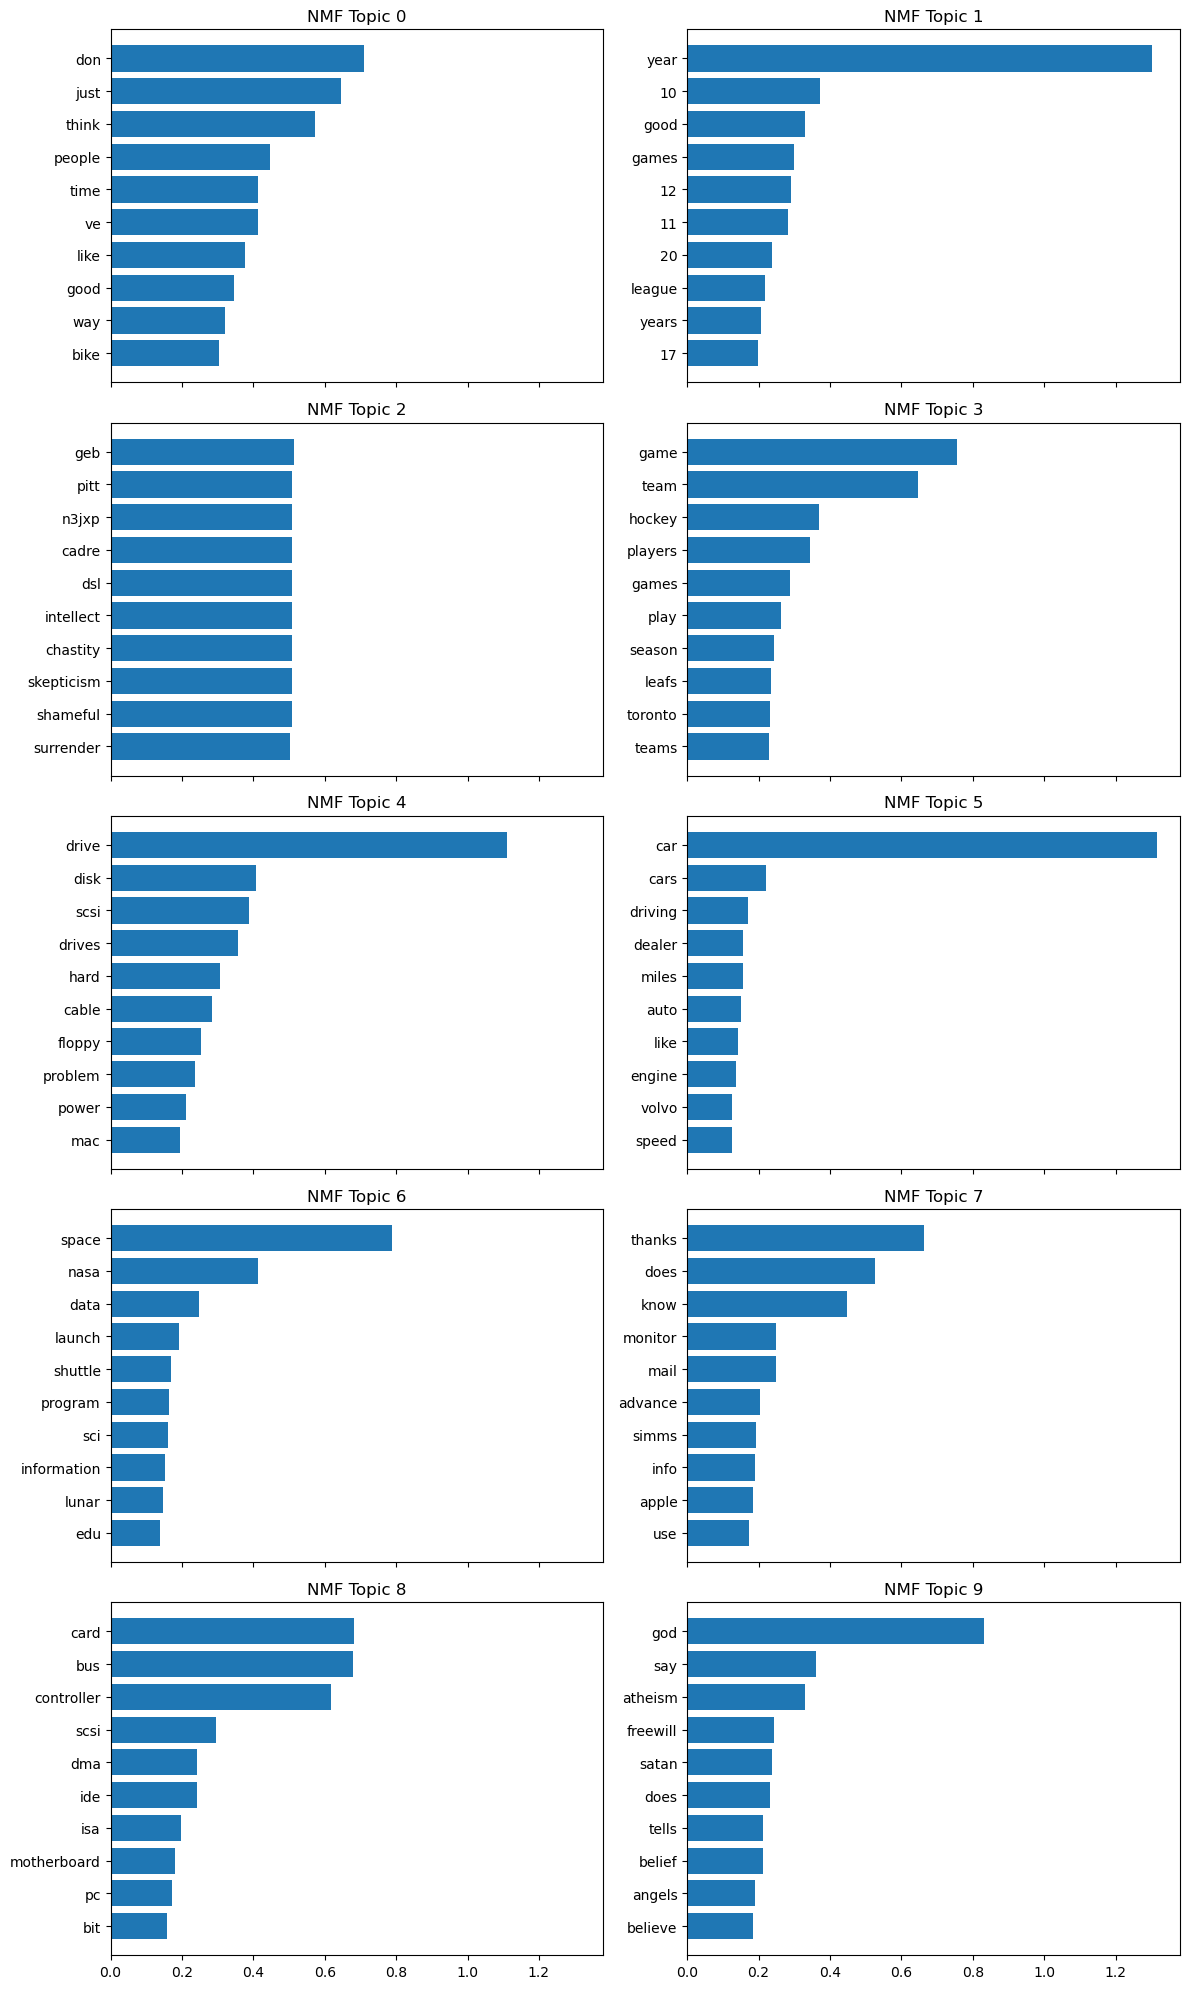

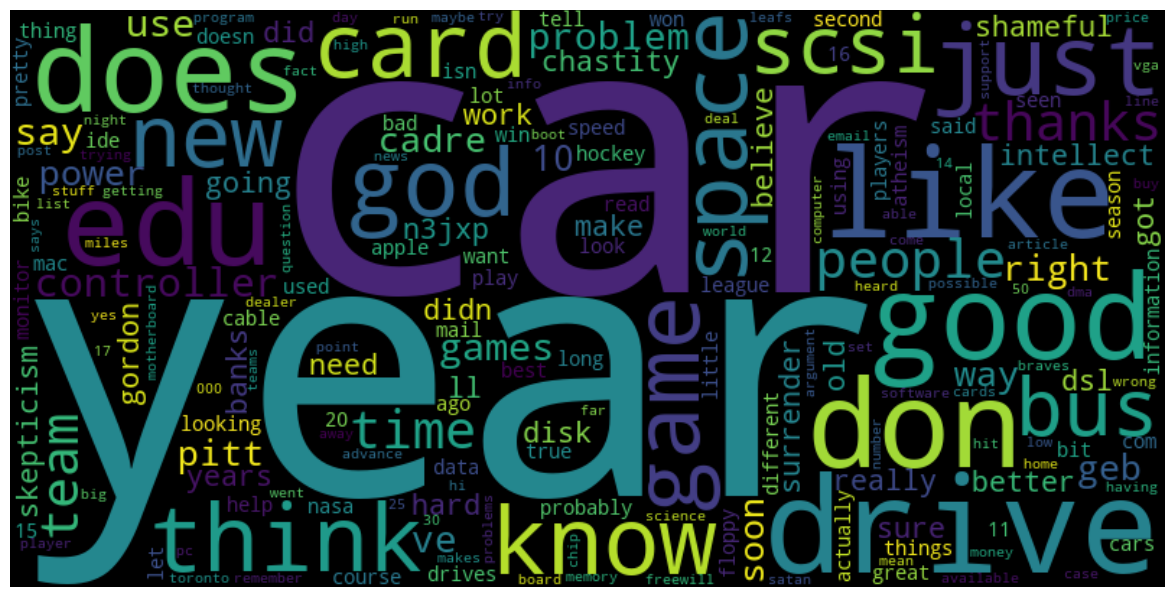

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorisation TF-IDF
vectorizer_nmf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer_nmf.fit_transform(docs)

# NMF
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf)

feat_nmf = vectorizer_nmf.get_feature_names_out()
nmf_topics = get_top_words(nmf, feat_nmf, 10)

# Affichage
print("NMF Topics:")
for i, topic in enumerate(nmf_topics):
    print(f"Topic {i}: {', '.join(topic)}")

# Bar charts NMF
fig, axes = plt.subplots(5, 2, figsize=(12, 20), sharex=True)
axes = axes.flatten()
for i, ax in enumerate(axes):
    comp = nmf.components_[i]
    idx = comp.argsort()[::-1][:10]
    words = feat_nmf[idx]
    weights = comp[idx]
    ax.barh(range(10), weights[::-1])
    ax.set_yticks(range(10))
    ax.set_yticklabels(words[::-1])
    ax.set_title(f"NMF Topic {i}")
fig.tight_layout()
plt.show()

# Word cloud global NMF
avg_nmf = nmf.components_.mean(axis=0)
freqs_nmf = {feat_nmf[i]: avg_nmf[i] for i in range(len(feat_nmf))}
wc2 = WordCloud(width=800, height=400).generate_from_frequencies(freqs_nmf)
plt.figure(figsize=(15, 7.5))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()